# This notebook shows how to design synthetic sequences by using motif implantation.
#### It consists of:
* Performing motif implantation experiments.
* Visualising motif distance and location preference experiments.
* Identify enriched flankings at the motif implanted locations.
* Cutting designed sequences.
* Adding repressors sites by single mutations
* Replacing the background sequence of an enhancer with 1 million random sequences		
#### Intermediate files are saved to ./data/motif_embedding folder
#### Figures are saved to ./figures/motif_embedding

### General imports


In [1]:
import sys  
import os
import pickle
import utils
import numpy as np
import scipy
import tensorflow as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Loading DeepFlyBrain data to be used for the initialization of shap.DeepExplainer


In [2]:
print('Loading data...')
f = open('./data/deepflybrain/DeepFlyBrain_nonAugmented_data.pkl', "rb")
nonAugmented_data_dict = pickle.load(f)
f.close()

Loading data...


### Loading the model and initializing shap.DeepExplainer


In [3]:
print('Loading model...')
import shap
tf.disable_eager_execution()
rn=np.random.choice(nonAugmented_data_dict["train_data"].shape[0], 250, replace=False)
model_dict = {}
exp_dict = {} 

name = "DeepFlyBrain"
model_json_file = "models/deepflybrain/model.json"
model_hdf5_file = "models/deepflybrain/model_epoch_83.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), nonAugmented_data_dict["train_data"][rn])


Loading model...


### Loading the generated sequences via in silico evolution

In [4]:
import pickle
f = open("data/deepflybrain/FLY_KC_EFS_6000_withmut.pkl", "rb")
evolved_seq_6000_dict = pickle.load(f)
f.close()

### Defining the TF patterns that are going to be implanted

In [5]:
patterns_dict = {"ey": "TGCTCACTCAAGCGTAA",
                 "mef2": "CTATTTATAG",
                 "onecut": "ATCGAT",
                 "sr": "CCACCC"}

for factor in patterns_dict:
    patterns_dict[factor] = utils.one_hot_encode_along_row_axis(patterns_dict[factor])

patterns_dict["eyR"] = np.copy(patterns_dict["ey"][:,::-1,::-1])
patterns_dict["mef2R"] = np.copy(patterns_dict["mef2"][:,::-1,::-1])

### Generating random sequences and implanting the motifs to the best location selected by highest model prediction score

In [6]:
# random_regions = random_sequence_gc_adjusted(seq_len=500, number_of_random_regions=2000, path_to_use_GC_content="data/deepflybrain/Genomic_KC_regions.fa")
# motif_embedding_dict = {}
# motif_embedding_dict["0"] = {}
# motif_embedding_dict["0"]["regions"] = np.copy(random_regions)

# path_to_save = "data/motif_embedding/motif_embedding_2000_emos_withR.pkl"

# motif_embedding_dict["e"] = add_pattern_to_best_location(patterns_dict["ey"], motif_embedding_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["m"] = add_pattern_to_best_location(patterns_dict["mef2"], motif_embedding_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["o"] = add_pattern_to_best_location(patterns_dict["onecut"], motif_embedding_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["s"] = add_pattern_to_best_location(patterns_dict["sr"], motif_embedding_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["em"] = add_pattern_to_best_location(patterns_dict["mef2"], motif_embedding_dict["e"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["eo"] = add_pattern_to_best_location(patterns_dict["onecut"], motif_embedding_dict["e"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["es"] = add_pattern_to_best_location(patterns_dict["sr"], motif_embedding_dict["e"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["emo"] = add_pattern_to_best_location(patterns_dict["onecut"], motif_embedding_dict["em"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["emos"] = add_pattern_to_best_location(patterns_dict["sr"], motif_embedding_dict["emo"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["me"] = add_pattern_to_best_location(patterns_dict["ey"], motif_embedding_dict["m"]["regions"], model_dict["DeepFlyBrain"], class_no=35)

# motif_embedding_dict["E"] = add_pattern_to_best_location(patterns_dict["eyR"], motif_embedding_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["Em"] = add_pattern_to_best_location(patterns_dict["mef2"], motif_embedding_dict["E"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["Emo"] = add_pattern_to_best_location(patterns_dict["onecut"], motif_embedding_dict["Em"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["EM"] = add_pattern_to_best_location(patterns_dict["mef2R"], motif_embedding_dict["E"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["EMo"] = add_pattern_to_best_location(patterns_dict["onecut"], motif_embedding_dict["EM"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["eM"] = add_pattern_to_best_location(patterns_dict["mef2R"], motif_embedding_dict["e"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_dict["eMo"] = add_pattern_to_best_location(patterns_dict["onecut"], motif_embedding_dict["eM"]["regions"], model_dict["DeepFlyBrain"], class_no=35)

# for key in motif_embedding_dict:
#     motif_embedding_dict[key]["prediction"] = model_dict["DeepFlyBrain"].predict(motif_embedding_dict[key]["regions"])
    
# import pickle
# f = open(path_to_save, "wb")
# pickle.dump(motif_embedding_dict,f)
# f.close()

In [7]:
path_to_file = "data/motif_embedding/motif_embedding_2000_emos_withR.pkl"

import pickle
f = open(path_to_file, "rb")
motif_embedding_dict = pickle.load(f)
f.close()

### Using the random sequences generated above and implanting the motifs to random locations

In [8]:
# from random import randrange

# def add_pattern_to_random_location(pattern, regions, model, class_no):
#     pattern_added_regions =  np.zeros(regions.shape,dtype="int")
#     pattern_locations = np.zeros(regions.shape[0],dtype="int")
#     print("Sequence index:",end=" ")
#     for r, region in enumerate(regions):
#         tmp_array = np.zeros((regions.shape[1]-pattern.shape[1]+1,regions.shape[1],regions.shape[2]))
#         rand_loc = randrange(tmp_array.shape[0])
#         tmp_array = np.copy(region)
#         tmp_array[rand_loc:rand_loc+pattern.shape[1],:] = pattern[0]
        
#         pattern_locations[r] = rand_loc
#         pattern_added_regions[r] = tmp_array
#         #print(r,end=",")
#     print("")
#     return {"regions":pattern_added_regions, "locations":pattern_locations}
    
# motif_embedding_randomloc_dict = {}
# motif_embedding_randomloc_dict["0"] = {}
# motif_embedding_randomloc_dict["0"]["regions"] = np.copy(motif_embedding_dict["0"]["regions"])

# path_to_save = "data/motif_embedding/motif_embedding_randomloc_2000_emos.pkl"

# motif_embedding_randomloc_dict["e"] = add_pattern_to_random_location(patterns_dict["ey"], motif_embedding_randomloc_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["m"] = add_pattern_to_random_location(patterns_dict["mef2"], motif_embedding_randomloc_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["o"] = add_pattern_to_random_location(patterns_dict["onecut"], motif_embedding_randomloc_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["s"] = add_pattern_to_random_location(patterns_dict["sr"], motif_embedding_randomloc_dict["0"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["em"] = add_pattern_to_random_location(patterns_dict["mef2"], motif_embedding_randomloc_dict["e"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["eo"] = add_pattern_to_random_location(patterns_dict["onecut"], motif_embedding_randomloc_dict["e"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["es"] = add_pattern_to_random_location(patterns_dict["sr"], motif_embedding_randomloc_dict["e"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["emo"] = add_pattern_to_random_location(patterns_dict["onecut"], motif_embedding_randomloc_dict["em"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["emos"] = add_pattern_to_random_location(patterns_dict["sr"], motif_embedding_randomloc_dict["emo"]["regions"], model_dict["DeepFlyBrain"], class_no=35)
# motif_embedding_randomloc_dict["me"] = add_pattern_to_random_location(patterns_dict["ey"], motif_embedding_randomloc_dict["m"]["regions"], model_dict["DeepFlyBrain"], class_no=35)

# for key in motif_embedding_randomloc_dict:
#     motif_embedding_randomloc_dict[key]["prediction"] = model_dict["DeepFlyBrain"].predict(motif_embedding_randomloc_dict[key]["regions"])
    
# import pickle
# f = open(path_to_save, "wb")
# pickle.dump(motif_embedding_randomloc_dict,f)
# f.close()

In [9]:
path_to_file = "data/motif_embedding/motif_embedding_randomloc_2000_emos.pkl"

import pickle
f = open(path_to_file, "rb")
motif_embedding_randomloc_dict = pickle.load(f)
f.close()

### Comparing prediction scores of the motif implanted (best location versus random location) sequences

In [12]:
print("Medians:",
      np.median(motif_embedding_dict['emos']["prediction"][:,34]),
      np.median(motif_embedding_randomloc_dict['emos']["prediction"][:,34]))

Medians: 0.9697675 0.07487653


### Plotting the prediction scores after each motif implantation steps

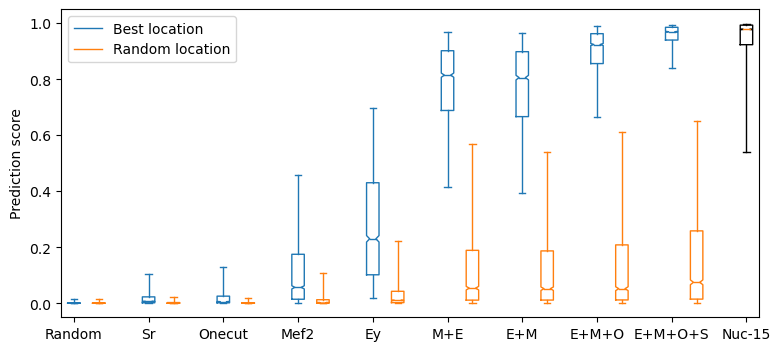

In [85]:
plt.figure(figsize=(9,4))

x = np.array([1,11])

Topic = 35
c = 'C0'
bp1 = plt.boxplot([motif_embedding_dict[key]["prediction"][:,Topic-1] for key in ['0', 's', 'o', 'm','e', 'em', 'me', 'emo', 'emos']],
                  notch=True,showfliers=False, whis=[5,95],positions=range(1,27,3),widths=0.5,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )
_ = plt.boxplot([evolved_seq_6000_dict["mut_pred"][:,15,34]],notch=True,showfliers=False, whis=[5,95],positions=range(28,30,3),widths=0.5)

c = 'C1'
bp2 = plt.boxplot([motif_embedding_randomloc_dict[key]["prediction"][:,Topic-1] for key in ['0', 's', 'o', 'm','e', 'em', 'me', 'emo', 'emos']],
                notch=True,showfliers=False, whis=[5,95],positions=range(2,27,3),widths=0.5,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )

plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Best location', 'Random location'], loc='upper left')

plt.ylim([-0.05,1.05])

_ = plt.xticks(list(range(1,30,3)),["Random","Sr","Onecut","Mef2","Ey","M+E","E+M","E+M+O","E+M+O+S","Nuc-15"])

plt.ylabel("Prediction score")
plt.savefig("figures/motif_embedding/boxplot_best_and_random_loc.pdf",transparent=True,dpi=300)

### Plotting the distribution of motif locations after motif implantation

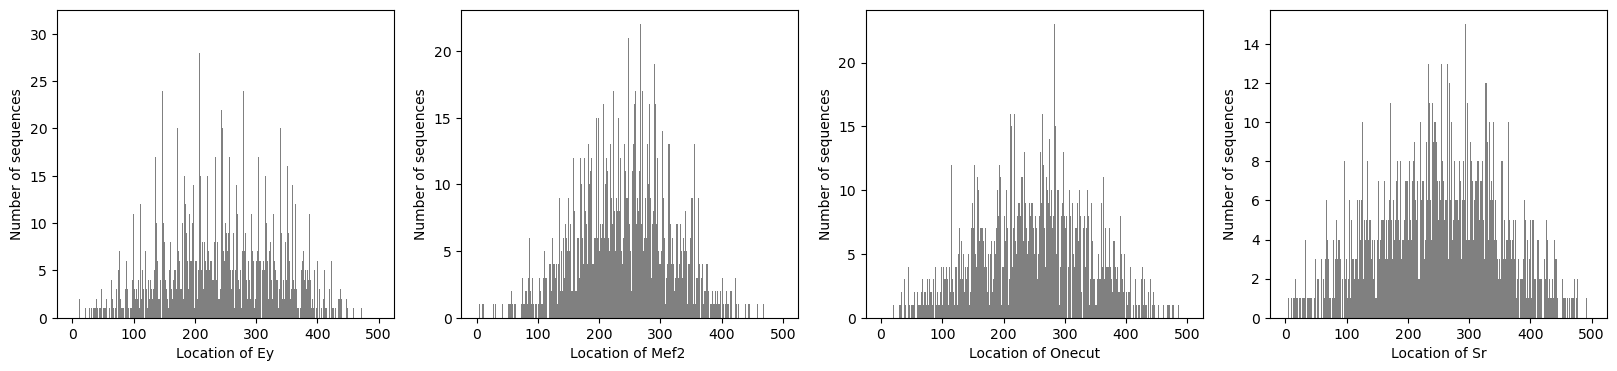

In [153]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(1,4,1)
_ = plt.hist(motif_embedding_dict['e']['locations'],bins=500,range=(0,500),color="gray")
plt.xlabel("Location of Ey")
plt.ylabel("Number of sequences")
ax = fig.add_subplot(1,4,2)
_ = plt.hist(motif_embedding_dict['em']['locations'],bins=500,range=(0,500),color="gray")
plt.xlabel("Location of Mef2 ")
plt.ylabel("Number of sequences")
ax = fig.add_subplot(1,4,3)
_ = plt.hist(motif_embedding_dict['emo']['locations'],bins=500,range=(0,500),color="gray")
plt.xlabel("Location of Onecut")
plt.ylabel("Number of sequences")
ax = fig.add_subplot(1,4,4)
_ = plt.hist(motif_embedding_dict['emos']['locations'],bins=500,range=(0,500),color="gray")
plt.xlabel("Location of Sr")
plt.ylabel("Number of sequences")
plt.savefig("figures/motif_embedding/motif_positional_distribution.pdf", transparent=True)

### Plotting the implantation location of a TF motif relative to another TF motif

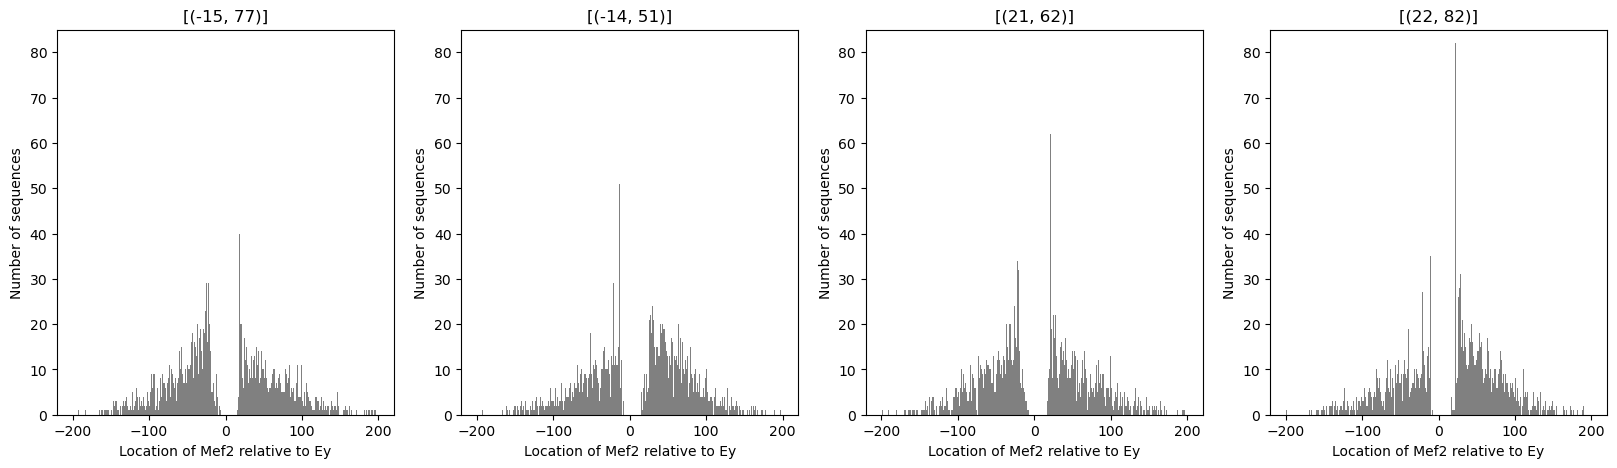

In [16]:
from collections import Counter

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,4,1)
a = plt.hist(motif_embedding_dict["em"]["locations"]-motif_embedding_dict["e"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Mef2 relative to Ey")
plt.ylabel("Number of sequences")
b = Counter(np.array(motif_embedding_dict["em"]["locations"]-motif_embedding_dict["e"]["locations"]))
plt.title((b.most_common(1)))
plt.ylim(0,85)

ax = fig.add_subplot(1,4,2)
a = plt.hist(motif_embedding_dict["Em"]["locations"]-motif_embedding_dict["E"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Mef2 relative to Ey")
plt.ylabel("Number of sequences")
b = Counter(np.array(motif_embedding_dict["Em"]["locations"]-motif_embedding_dict["E"]["locations"]))
plt.title((b.most_common(1)))
plt.ylim(0,85)

ax = fig.add_subplot(1,4,3)
a = plt.hist(motif_embedding_dict["eM"]["locations"]-motif_embedding_dict["e"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Mef2 relative to Ey")
plt.ylabel("Number of sequences")
b = Counter(np.array(motif_embedding_dict["eM"]["locations"]-motif_embedding_dict["e"]["locations"]))
plt.title((b.most_common(1)))
plt.ylim(0,85)

ax = fig.add_subplot(1,4,4)
a = plt.hist(motif_embedding_dict["EM"]["locations"]-motif_embedding_dict["E"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Mef2 relative to Ey")
plt.ylabel("Number of sequences")
b = Counter(np.array(motif_embedding_dict["EM"]["locations"]-motif_embedding_dict["E"]["locations"]))
plt.title((b.most_common(1)))
plt.ylim(0,85)
plt.savefig("figures/motif_embedding/mef2_ey_distance_with_reverse.pdf",transparent=True,dpi=300)

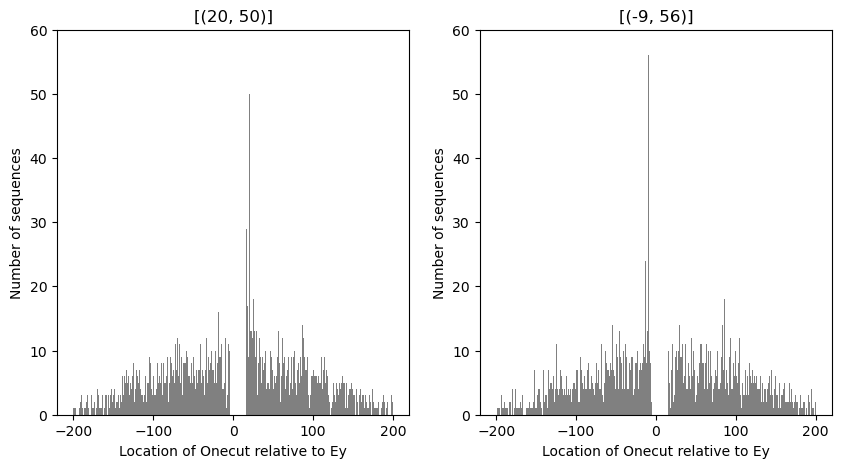

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
a = plt.hist(motif_embedding_dict["emo"]["locations"]-motif_embedding_dict["e"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Onecut relative to Ey")
plt.ylabel("Number of sequences")
b = Counter(np.array(motif_embedding_dict["emo"]["locations"]-motif_embedding_dict["e"]["locations"]))
plt.title((b.most_common(1)))
plt.ylim(0,60)

ax = fig.add_subplot(1,2,2)
a = plt.hist(motif_embedding_dict["Emo"]["locations"]-motif_embedding_dict["E"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Onecut relative to Ey")
plt.ylabel("Number of sequences")
b = Counter(np.array(motif_embedding_dict["Emo"]["locations"]-motif_embedding_dict["E"]["locations"]))
plt.title((b.most_common(1)))
plt.ylim(0,60)

plt.savefig("figures/motif_embedding/onecut_ey_distance_with_reverse.pdf",transparent=True,dpi=300)

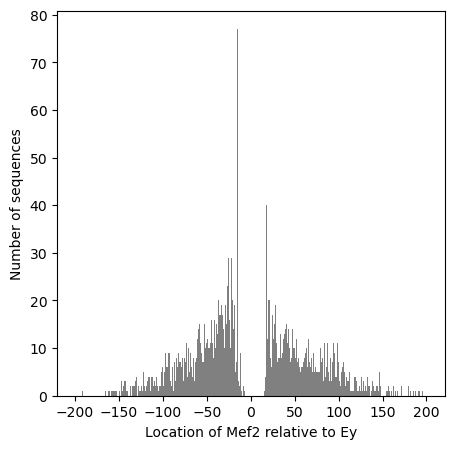

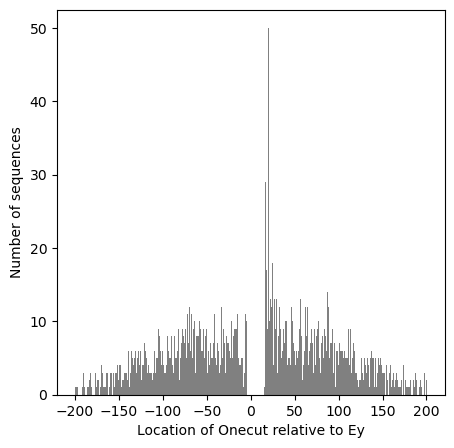

In [20]:
plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["em"]["locations"]-motif_embedding_dict["e"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Mef2 relative to Ey")
plt.ylabel("Number of sequences")
plt.savefig("figures/motif_embedding/mef2_ey_distance.pdf",transparent=True,dpi=300)

plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["emo"]["locations"]-motif_embedding_dict["e"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Onecut relative to Ey")
plt.ylabel("Number of sequences")
plt.savefig("figures/motif_embedding/onecut_ey_distance.pdf",transparent=True,dpi=300)


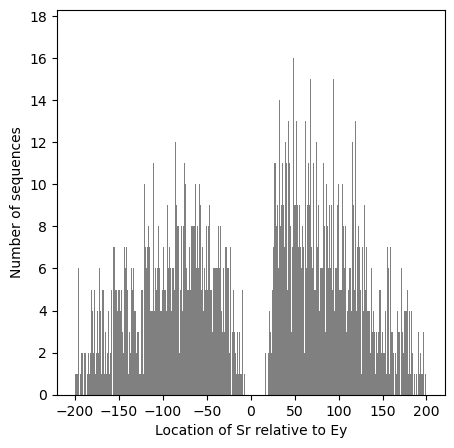

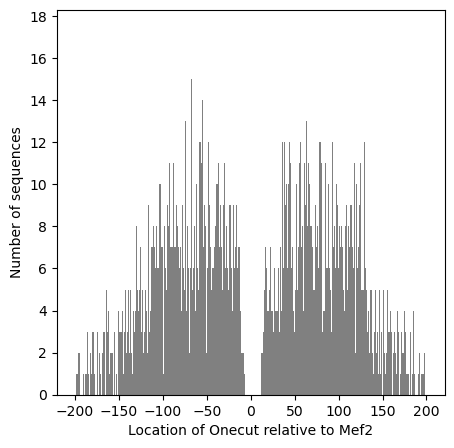

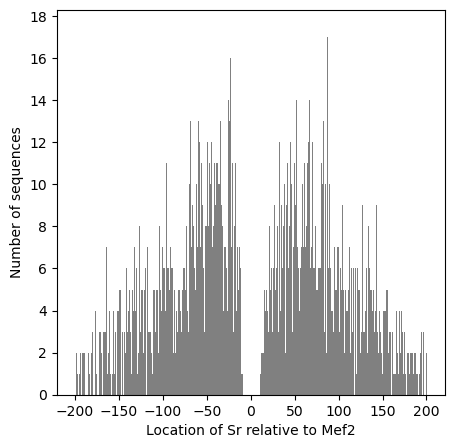

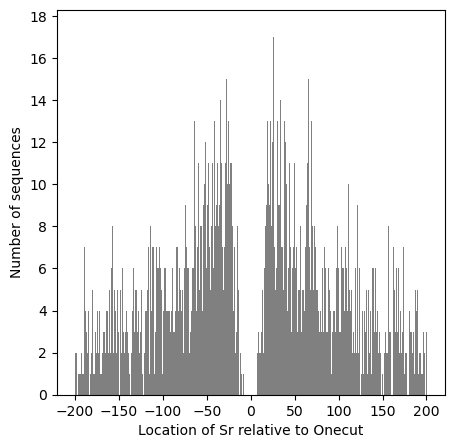

In [21]:
plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["emos"]["locations"]-motif_embedding_dict["e"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Sr relative to Ey")
plt.ylabel("Number of sequences")
plt.ylim(0,18.3)
plt.yticks(range(0,19,2),list(range(0,19,2)))
plt.savefig("figures/motif_embedding/sr_ey_distance.pdf",transparent=True,dpi=300)

plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["emo"]["locations"]-motif_embedding_dict["em"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Onecut relative to Mef2")
plt.ylabel("Number of sequences")
plt.ylim(0,18.3)
plt.yticks(range(0,19,2),list(range(0,19,2)))
plt.savefig("figures/motif_embedding/onecut_mef2_distance.pdf",transparent=True,dpi=300)

plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["emos"]["locations"]-motif_embedding_dict["em"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Sr relative to Mef2")
plt.ylabel("Number of sequences")
plt.ylim(0,18.3)
plt.yticks(range(0,19,2),list(range(0,19,2)))
plt.savefig("figures/motif_embedding/sr_mef2_distance.pdf",transparent=True,dpi=300)

plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["emos"]["locations"]-motif_embedding_dict["emo"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of Sr relative to Onecut")
plt.ylabel("Number of sequences")
plt.ylim(0,18.3)
plt.yticks(range(0,19,2),list(range(0,19,2)))
plt.savefig("figures/motif_embedding/sr_onecut_distance.pdf",transparent=True,dpi=300)

### Identify enriched flankings at the motif implanted locations.

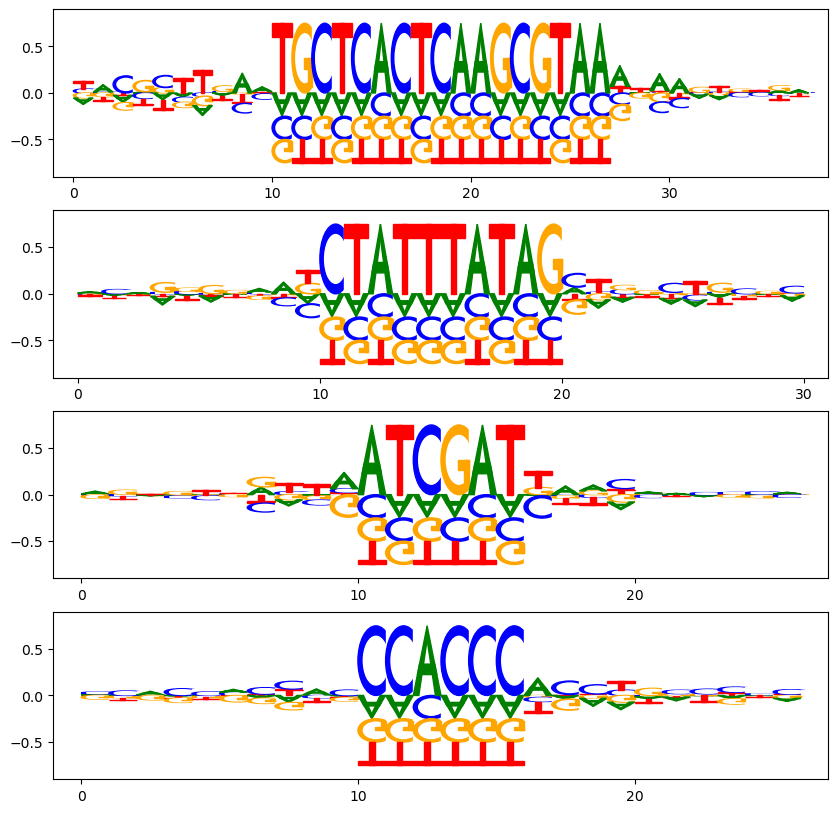

In [302]:
fig = plt.figure(figsize=(10,10))

x = np.zeros((patterns_dict['ey'].shape[1]+20,4))
for id_ in range(len(motif_embedding_dict["emos"]["locations"])):
    loc_ = motif_embedding_dict["e"]["locations"][id_]
    if loc_ >= 10 and loc_ <= 500-patterns_dict['onecut'].shape[1]-10:
        x = x + motif_embedding_dict["e"]['regions'][id_][loc_-10:loc_-10+len(x),:] 
_, ax1 = utils.plot_weights(x/2000-0.25,
                          fig, 4, 1, 1,
                          title="", subticks_frequency=10, ylab="")

x = np.zeros((patterns_dict['mef2'].shape[1]+20,4))
for id_ in range(len(motif_embedding_dict["emos"]["locations"])):
    loc_ = motif_embedding_dict["em"]["locations"][id_]
    if loc_ >= 10 and loc_ <= 500-patterns_dict['onecut'].shape[1]-10:
        x = x + motif_embedding_dict["em"]['regions'][id_][loc_-10:loc_-10+len(x),:] 
_, ax1 = utils.plot_weights(x/2000-0.25,
                          fig, 4, 1, 2,
                          title="", subticks_frequency=10, ylab="")

x = np.zeros((patterns_dict['onecut'].shape[1]+20,4))
for id_ in range(len(motif_embedding_dict["emos"]["locations"])):
    loc_ = motif_embedding_dict["emo"]["locations"][id_]
    if loc_ >= 10 and loc_ <= 500-patterns_dict['onecut'].shape[1]-10:
        x = x + motif_embedding_dict["emo"]['regions'][id_][loc_-10:loc_-10+len(x),:] 
_, ax1 = utils.plot_weights(x/2000-0.25,
                          fig, 4, 1, 3,
                          title="", subticks_frequency=10, ylab="")

x = np.zeros((patterns_dict['sr'].shape[1]+20,4))
for id_ in range(len(motif_embedding_dict["emos"]["locations"])):
    loc_ = motif_embedding_dict["emos"]["locations"][id_]
    if loc_ >= 10 and loc_ <= 500-patterns_dict['onecut'].shape[1]-10:
        x = x + motif_embedding_dict["emos"]['regions'][id_][loc_-10:loc_-10+len(x),:] 
_, ax1 = utils.plot_weights(x/2000-0.25,
                          fig, 4, 1, 4,
                          title="", subticks_frequency=10, ylab="")

plt.savefig("figures/motif_embedding/preferred_flankings.pdf",transparent=True,dpi=300)

In [35]:
path_to_file = "data/motif_embedding/motif_embedding_emos_original.pkl"
import pickle
f = open(path_to_file, "rb")
motif_embedding_dict_original = pickle.load(f)
f.close()

### Plotting nucleotide contribution scores together with in silico saturation mutagenesis values of a sequence before and after motif implantation and after repressor addition

0,1,2,3,4,

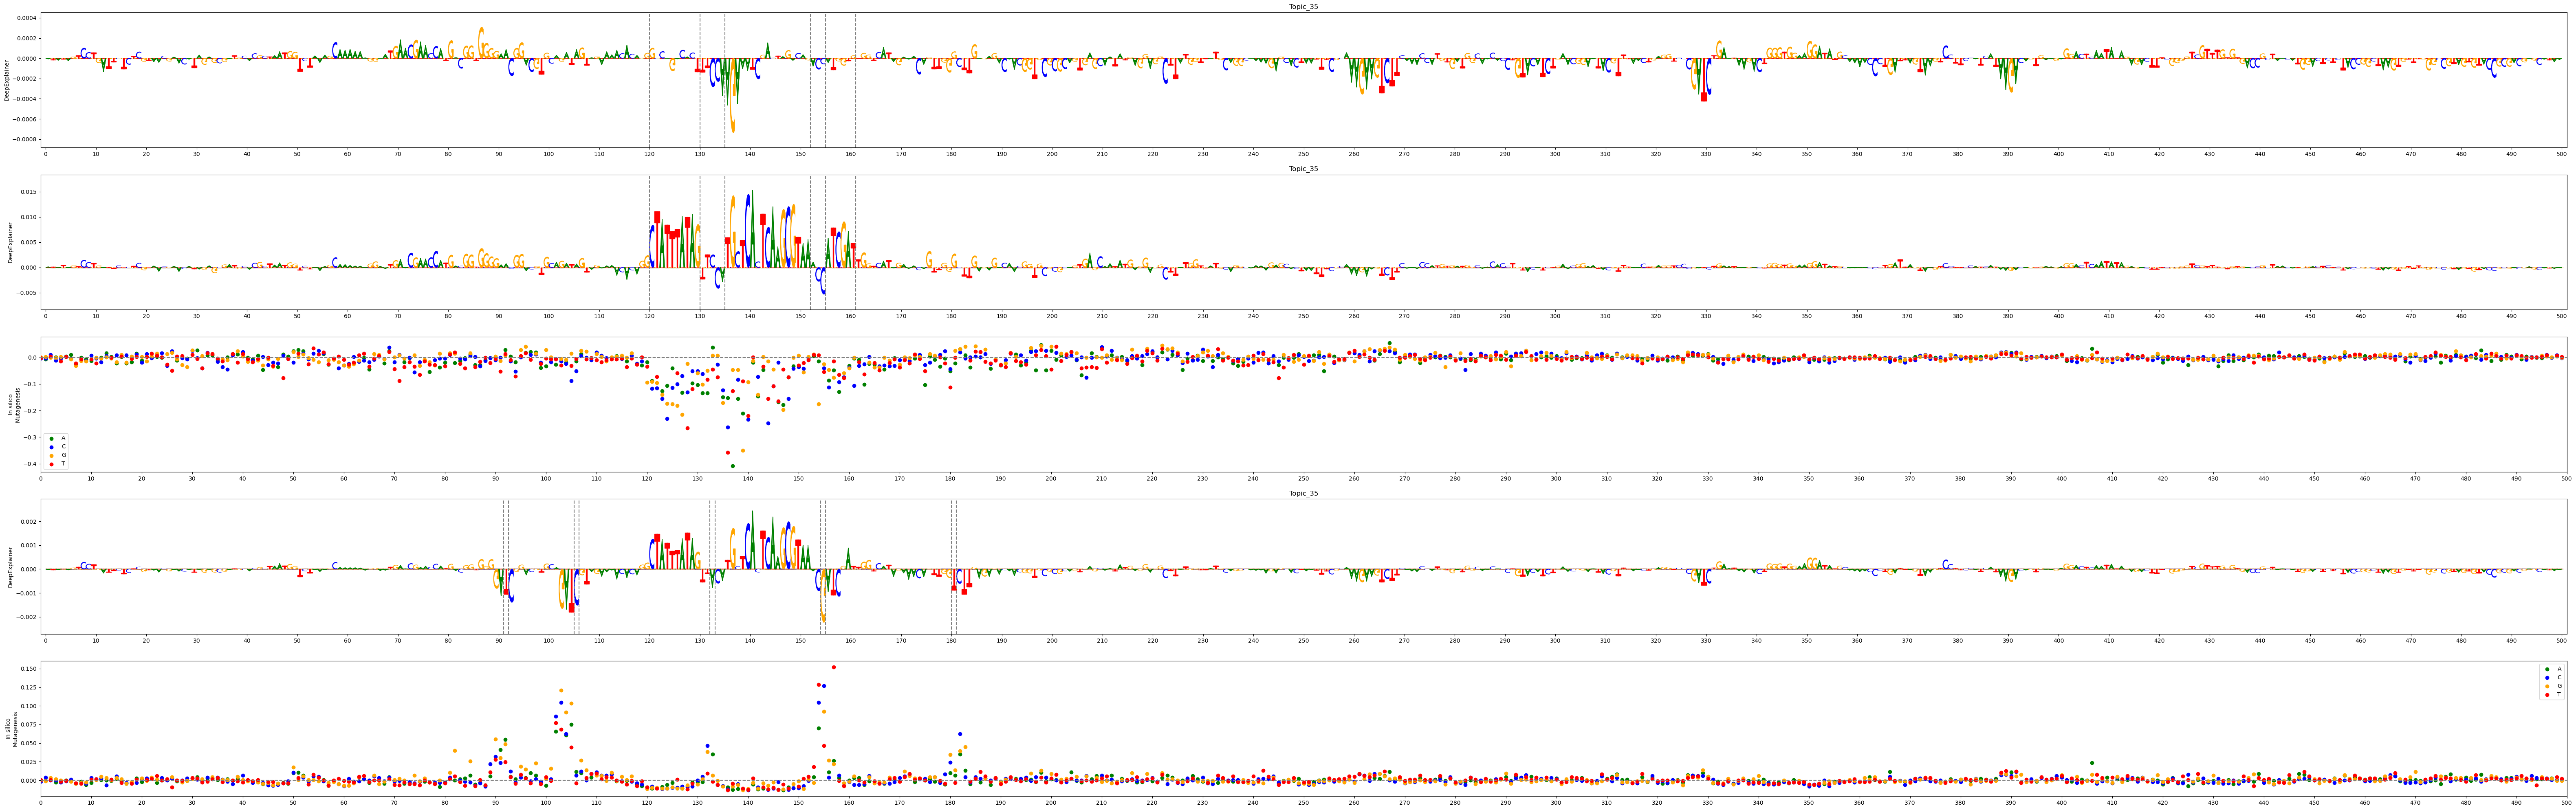

In [43]:
nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}
id_ = 1909

ntrack = 5
fig = plt.figure(figsize=(80,ntrack*5))

start_x  = np.copy(motif_embedding_dict_original['0']['regions'][id_:id_+1])
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 35)

start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])
ax2 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=start_x, class_no = 35)


for ax_ in [ax1,ax2]:
    ax_.axvline(x=motif_embedding_dict_original['e']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['e']['locations'][id_]+17,linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict_original['em']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['em']['locations'][id_]+10,linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict_original['emo']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['emo']['locations'][id_]+6,linestyle="--",color="gray")


start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])

muts = ["154_G","132_A","105_C","91_T","180_T"]
for i, mut_ in enumerate(muts):
    print(i,end=",")
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')

ax3 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=5, seq_onehot=start_x, class_no = 35)

muts = ["154_G","132_A","105_C","91_T","180_T"]
for i, mut_ in enumerate(muts):
    
    ax3.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax3.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
    
plt.savefig("figures/motif_embedding/id1909_ey_mef2_onecut_repressors_deepexplainer.pdf",transparent=True,dpi=300)

### Printing generated DNA sequences in nucleotide letters for the region with motif implanted and repressor created

In [44]:
id_ = 1909
start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])
muts = ["154_G","132_A","105_C","91_T","180_T"]
for i, mut_ in enumerate(muts):
    print(i,end=",")
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
print("")
for nuc in start_x[0]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")
print("")

0,1,2,3,4,
ATATAGTCCTGATTCTCTCGTAACGAACATAGAGCGATGCACGCTAATGGTCTAAAGCAAAAAAGGAATGAACGAACCATGACGGTGGGGATCGGACGTGCAGATCGTAGAAAACACAGGCTATTTATAGTTACATGCTCACTCAAGCGTAAACGATCGATTGGTCATAGAAACAGTTGGTCTTGAGAGACAACGGTGCGCGCAGTGAGCAATATGAGGAGGCTTATGGTTATGCAGGCAAAAGAGCACTAATTTCGCAAAGAAGTCTTCAAACCATGTGATGGCAACACCTGTACATCTGAACGGAATACGTTTAACTGAGGTCCCGATCTGAATAAGACTGGGTGGAAGGATATGCAAAACCCTGATTAGTAAGTCCTTCCATCATAAGACAGTGAAGAGGACTCAATATAGAGACTTTCGGGGTCGTTTGTGTGACCGCTAACATGGACTCTCTACCGGCTAAGTGTTTGGGCCGTAGTGTACCGCGACGAGCATAA


In [ ]:
pred_initial = model_dict["KC_T_Glia"].predict(shuffled_regions_1941)
pred_ey = model_dict["KC_T_Glia"].predict(shuffled_regions_1941_ey_added)
pred_ey_mef2 = model_dict["KC_T_Glia"].predict(shuffled_regions_1941_ey_mef2_added)
pred_ey_mef2_onecut = model_dict["KC_T_Glia"].predict(shuffled_regions_1941_ey_mef2_onecut_added)

In [45]:
id_ = 1909
start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])

muts = ["154_G","132_A","105_C","91_T","180_T"]
for i, mut_ in enumerate(muts):
    print(i,end=",")
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
pred_ey_mef2_onecut_repr = model_dict["DeepFlyBrain"].predict(start_x)

0,1,2,3,4,

In [48]:
id_ = 1909
pred = []
pred.append(motif_embedding_dict_original['0']['prediction'][id_][34])
pred.append(motif_embedding_dict_original['e']['prediction'][id_][34])
pred.append(motif_embedding_dict_original['em']['prediction'][id_][34])
pred.append(motif_embedding_dict_original['emo']['prediction'][id_][34])
pred.append(pred_ey_mef2_onecut_repr[0][34])


### Plotting prediction scores together of a sequence during motif implantation and after repressor addition

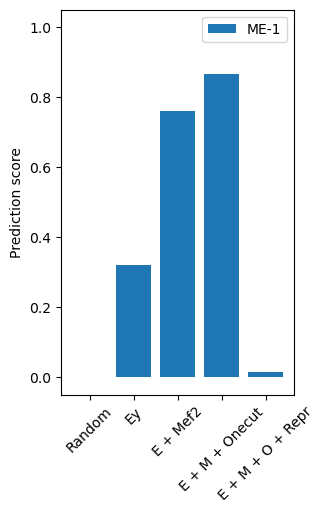

In [57]:
plt.figure(figsize=(3,5))
_ = plt.bar(range(5),pred,label="ME-1",color="C"+str(0))
#_ = plt.plot(pred,linestyle="--",linewidth=0.5,color="C"+str(0))  

plt.legend()    
plt.ylim([-0.05,1.05])
_ = plt.xticks(range(5),['Random','Ey','E + Mef2','E + M + Onecut','E + M + O + Repr'],rotation=45)
plt.ylabel("Prediction score")
plt.savefig("figures/motif_embedding/id1909_ey_mef2_onecut_repressors_prediction.pdf",transparent=True)

### Plotting nucleotide contribution scores together with in silico saturation mutagenesis values of a sequence before and after motif implantation and after repressor addition

0,1,2,3,4,

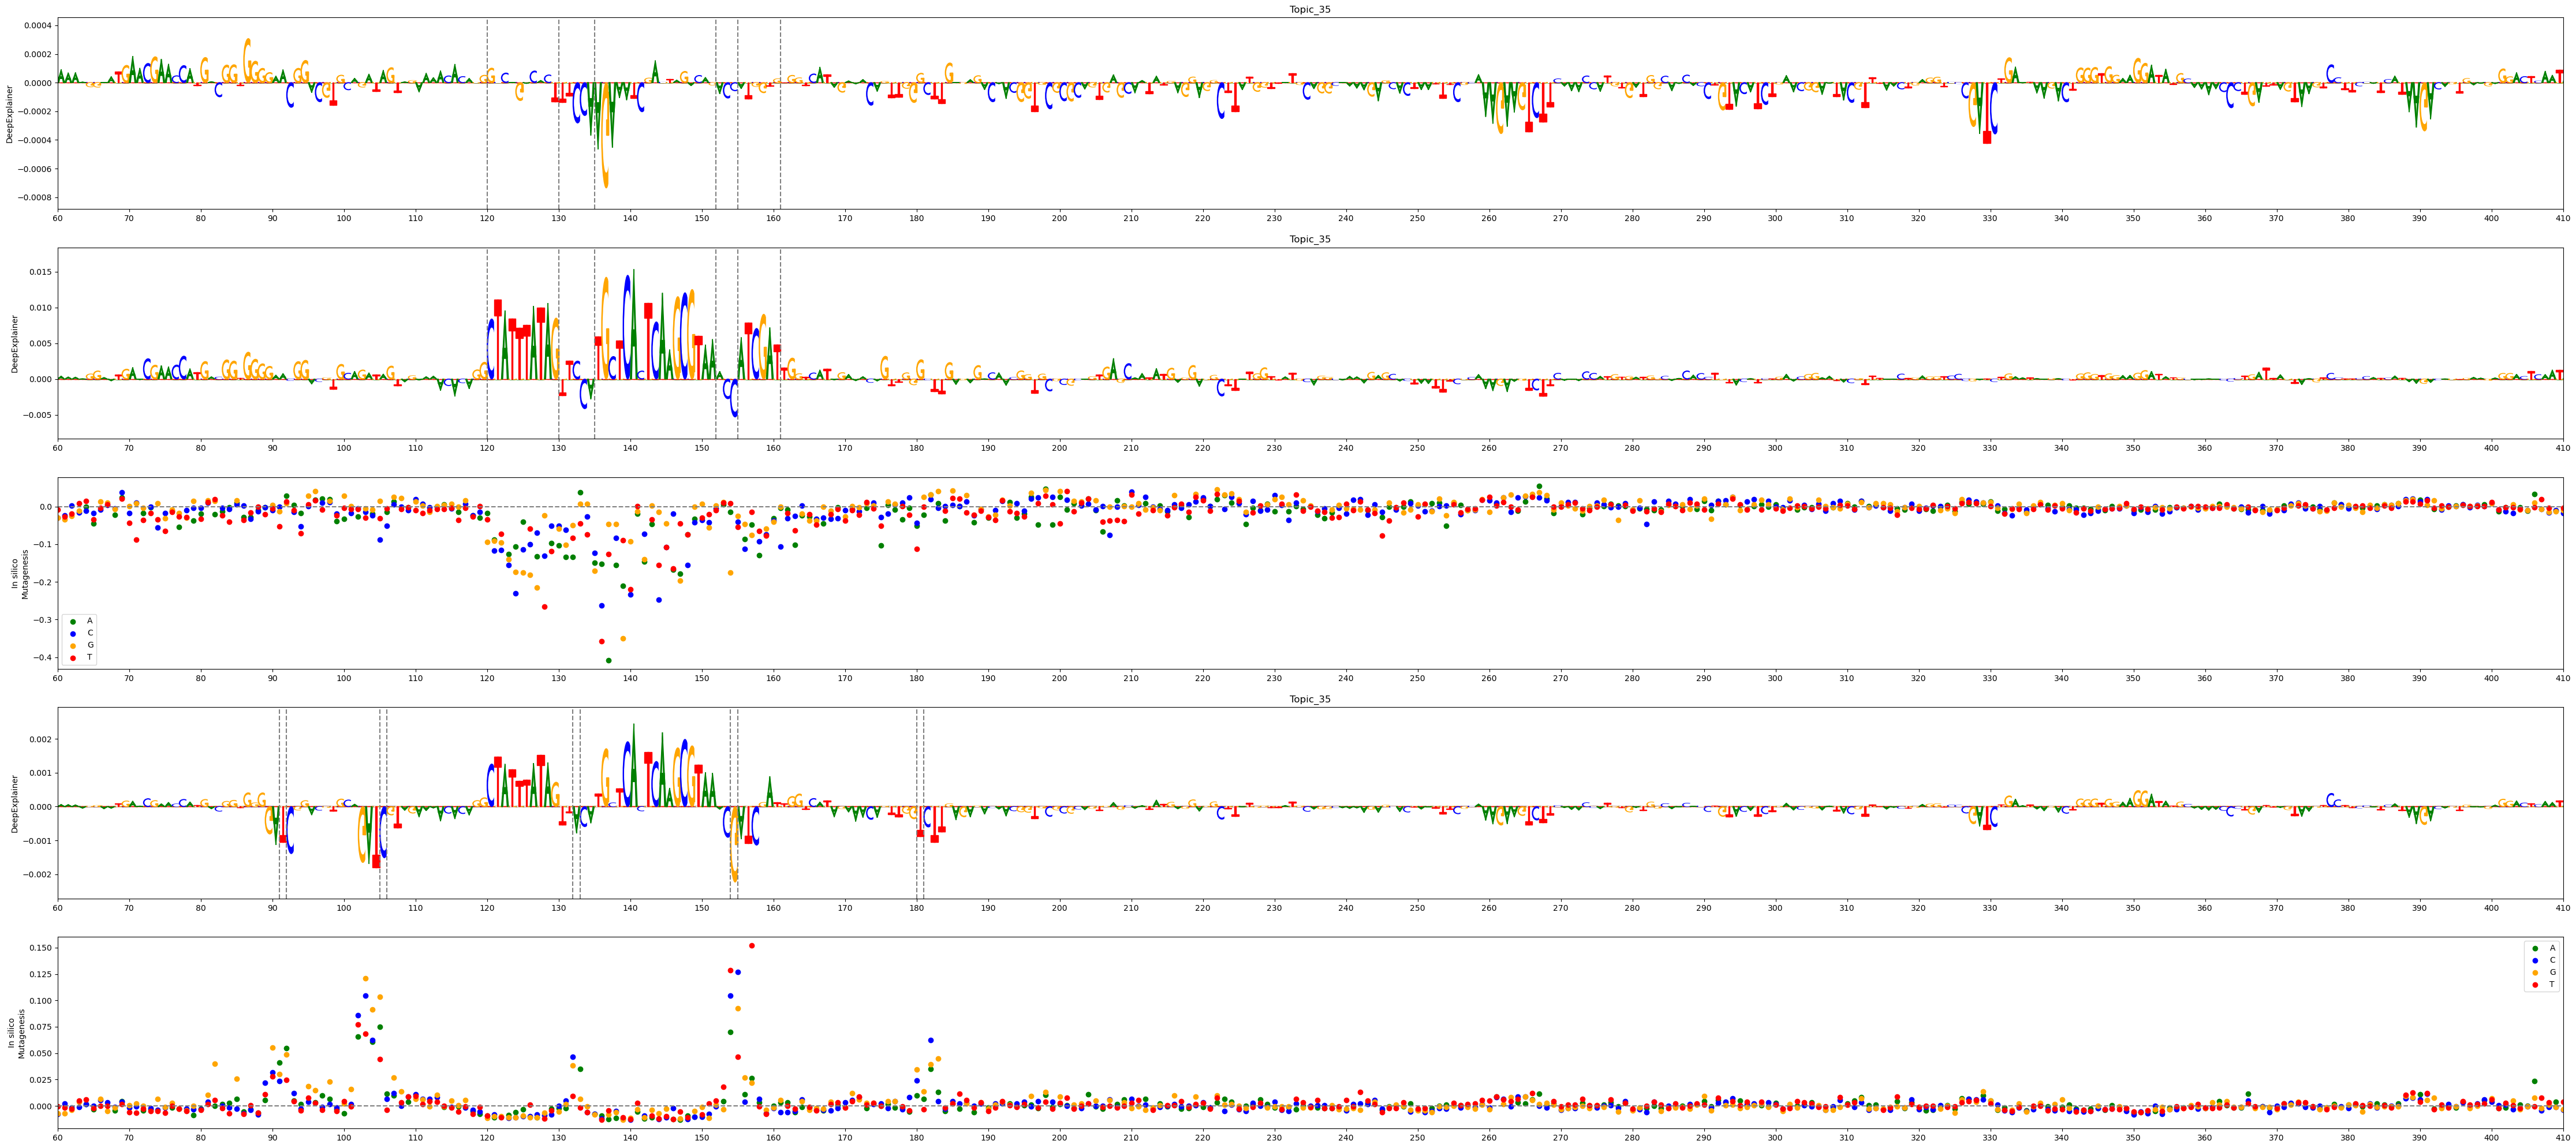

In [60]:
st = 60
end = 410

nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}
id_ = 1909

ntrack = 5
fig = plt.figure(figsize=(56,ntrack*5))

start_x  = np.copy(motif_embedding_dict_original['0']['regions'][id_:id_+1])
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 35)

start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])
ax2 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 35)
ax3 = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=start_x, class_no = 35)


for ax_ in [ax1,ax2]:
    ax_.axvline(x=motif_embedding_dict_original['e']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['e']['locations'][id_]+17,linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict_original['em']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['em']['locations'][id_]+10,linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict_original['emo']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['emo']['locations'][id_]+6,linestyle="--",color="gray")


start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])

muts = ["154_G","132_A","105_C","91_T","180_T"]
for i, mut_ in enumerate(muts):
    print(i,end=",")
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')

ax4 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=start_x, class_no = 35)
ax5 = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=5, seq_onehot=start_x, class_no = 35)

muts = ["154_G","132_A","105_C","91_T","180_T"]
for i, mut_ in enumerate(muts):
    
    ax4.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax4.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
    
ax1.set_xlim([st,end])
ax2.set_xlim([st,end])
ax3.set_xlim([st,end])
ax4.set_xlim([st,end])
ax5.set_xlim([st,end])

plt.savefig("figures/motif_embedding/id1909_ey_mef2_onecut_repressors_deepexplainer_st60_end_410.pdf",transparent=True,dpi=300)


### Plotting nucleotide contribution scores of the cut sequence

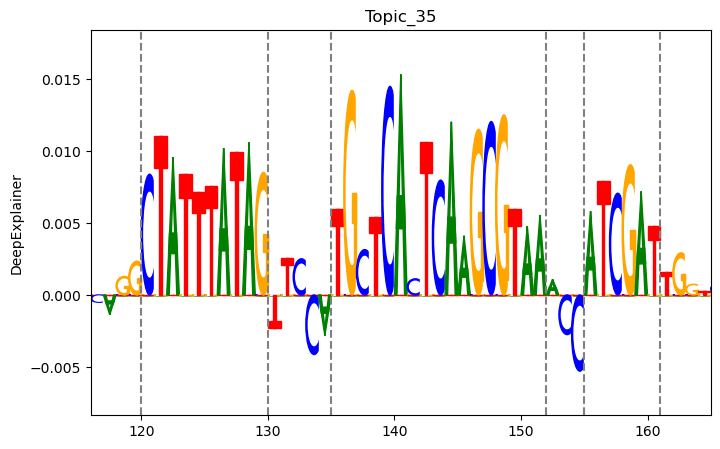

In [62]:
st = 116
end = 165

ntrack = 1
fig = plt.figure(figsize=(8,ntrack*5))
start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 35)

for ax_ in [ax1]:
    ax_.axvline(x=motif_embedding_dict_original['e']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['e']['locations'][id_]+17,linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict_original['em']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['em']['locations'][id_]+10,linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict_original['emo']['locations'][id_],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict_original['emo']['locations'][id_]+6,linestyle="--",color="gray")
    
ax1.set_xlim([st,end])

plt.savefig("figures/motif_embedding/id1909_ey_mef2_onecut_deepexplainer_st116_end165.pdf",transparent=True)


### Replacing the background sequence of an enhancer with 1 million random sequences

In [328]:
# from random import choice
# def generate_random_short_seqs(len_char):
#     X_all = []
#     allchar = "ACTG"
#     for i in range(1010000):
#         password = "".join(choice(allchar) for _x in range(len_char))
#         X_all.append(password)
#     X_all = list(set(X_all))[:1000000]
#     return X_all

# gen_seqs = generate_random_short_seqs(20)
# gen_seqs_X = np.array([utils.one_hot_encode_along_row_axis(i) for i in gen_seq_motifs]).squeeze(axis=1)

# start_x  = np.copy(motif_embedding_dict_original['emo']['regions'][id_:id_+1])
# repeated_start_x = np.repeat(start_x, 1000000, axis=0)

# repeated_start_x[:,114:120,:] = gen_seqs_X[:,:6,:]
# repeated_start_x[:,130:135,:] = gen_seqs_X[:,6:11,:]
# repeated_start_x[:,152:155,:] = gen_seqs_X[:,11:14,:]
# repeated_start_x[:,161:167,:] = gen_seqs_X[:,14:20,:]

# random_background_predictions = model_dict["DeepFlyBrain"].predict(repeated_start_x)

# import pickle
# f = open("data/motif_embedding/random_background_1M_20bp.pkl", "wb")
# pickle.dump(gen_seqs_X,f)
# pickle.dump(repeated_start_x,f)
# pickle.dump(random_background_predictions,f)
# f.close()


In [ ]:
path_to_file = "data/motif_embedding/random_background_1M_20bp.pkl"
import pickle
f = open(path_to_file, "rb")
gen_seqs_X = pickle.load(f)
repeated_start_x = pickle.load(f)
random_background_predictions = pickle.load(f)
f.close()

### Ploting the prediction score distribution after replacing the background sequence of an enhancer with 1 million random sequences

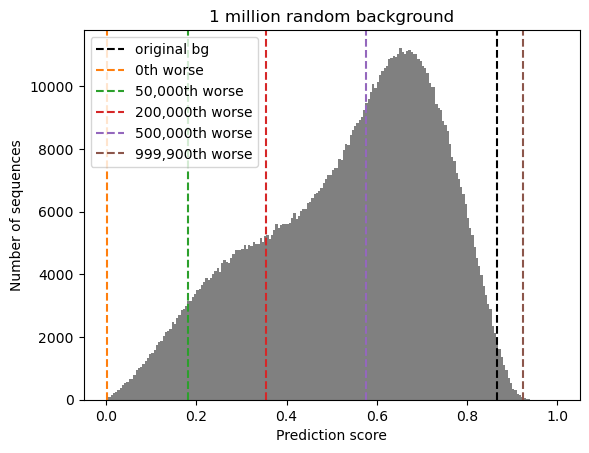

In [408]:
ids = np.argsort(random_background_predictions[:,34])[[0,50000,200000,500000,999900]]

_ = plt.hist(random_background_predictions[:,34],bins=200,range=(0,1),color='gray')
plt.axvline(x=model_dict['DeepFlyBrain'].predict(motif_embedding_dict_original['emo']['regions'][1909:1909+1])[:,34],color='black',linestyle="--",label='original bg')
plt.axvline(x=random_background_predictions[:,34][ids[0]],color="C1",linestyle="--",label='0th worse')
plt.axvline(x=random_background_predictions[:,34][ids[1]],color="C2",linestyle="--",label='50,000th worse')
plt.axvline(x=random_background_predictions[:,34][ids[2]],color="C3",linestyle="--",label='200,000th worse')
plt.axvline(x=random_background_predictions[:,34][ids[3]],color="C4",linestyle="--",label='500,000th worse')
plt.axvline(x=random_background_predictions[:,34][ids[4]],color="C5",linestyle="--",label='999,900th worse')
plt.xlabel("Prediction score")
plt.ylabel("Number of sequences")
plt.title("1 million random background")
plt.legend()

plt.savefig("figures/motif_embedding/random_background_worst_0_50K_200K_500K_999900_predictions.pdf",transparent=True)

In [409]:
np.sum(random_background_predictions[:,34] > model_dict['DeepFlyBrain'].predict(motif_embedding_dict_original['emo']['regions'][1909:1909+1])[:,34])

9023

### Plotting nucleotide contribution scores together with in silico saturation mutagenesis values of different sequences sampled from the 1 million background sequence experiment

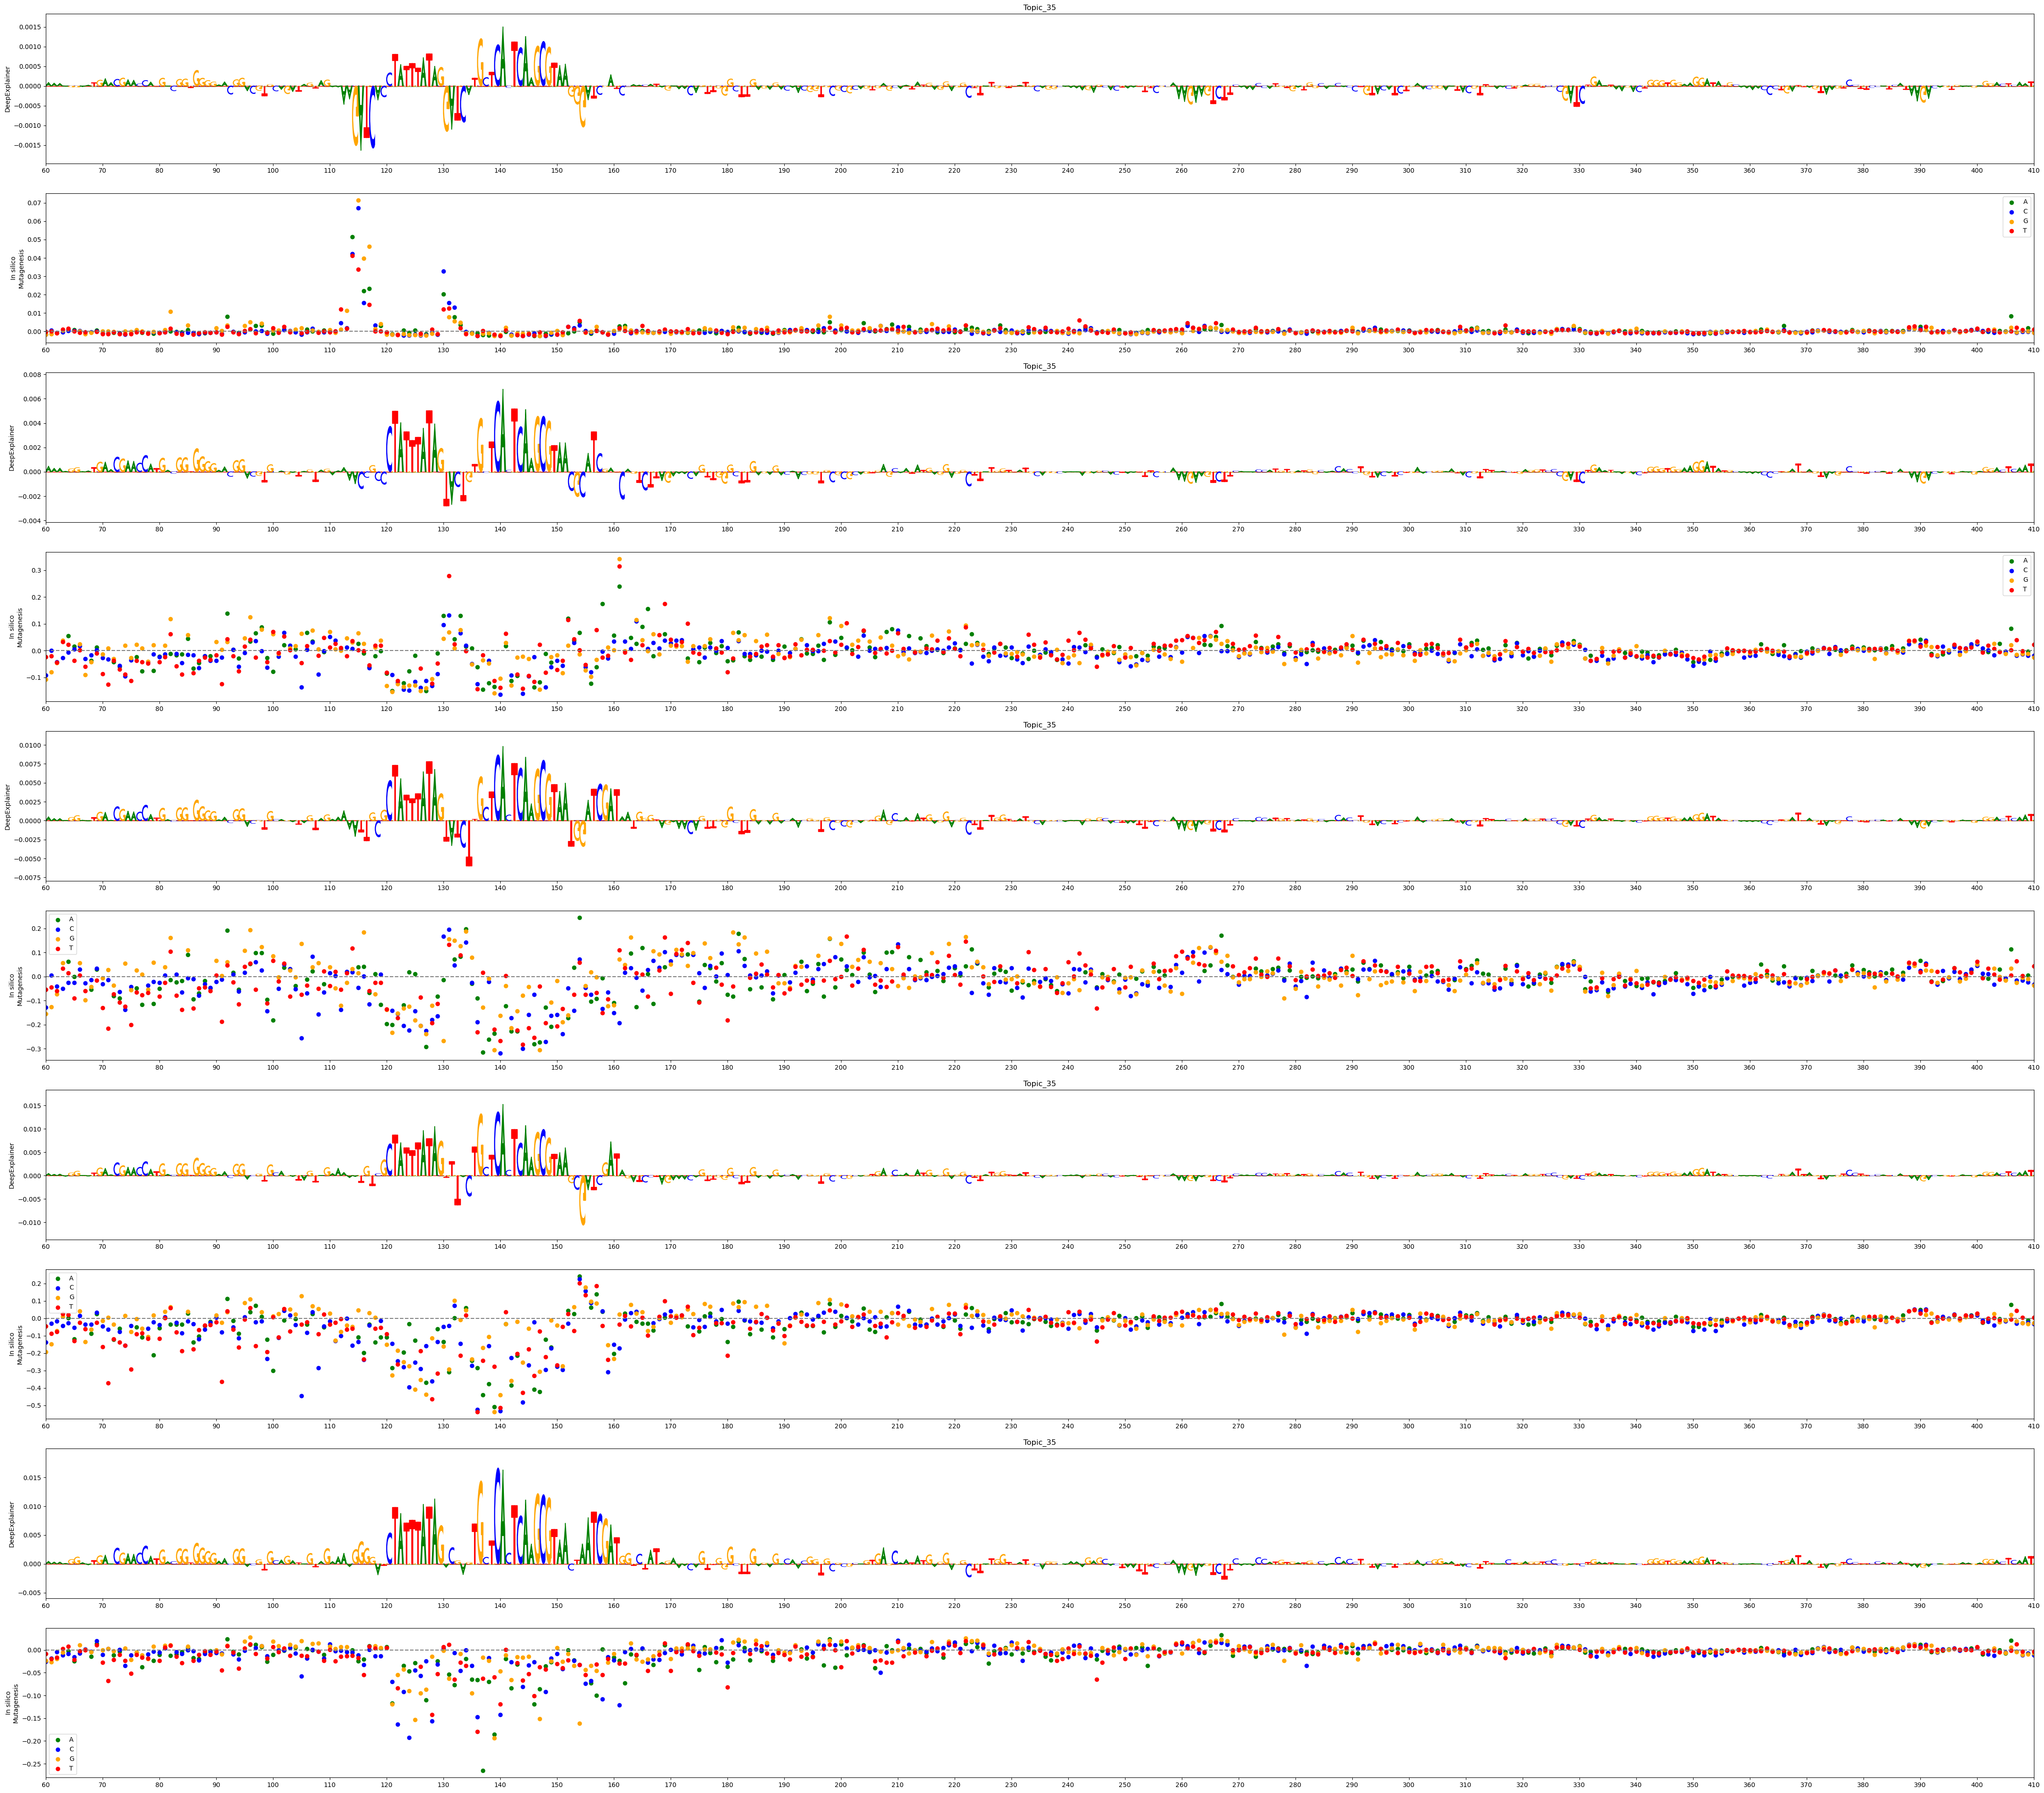

In [394]:
ids = np.argsort(random_background_predictions[:,34])[[0,50000,200000,500000,999900]]

st = 60
end = 410

nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}

ntrack = 10
fig = plt.figure(figsize=(56,ntrack*5))

for i,id_ in enumerate(ids):
    start_x  = np.copy(repeated_start_x[id_:id_+1])
    ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=i*2+1, seq_onehot=start_x, class_no = 35)
    ax1.set_xlim([st,end])
    ax2 = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=i*2+2, seq_onehot=start_x, class_no = 35)
    ax2.set_xlim([st,end])

plt.savefig("figures/motif_embedding/random_background_worst_0_50K_200K_500K_999900_deepexplainer.pdf",transparent=True)

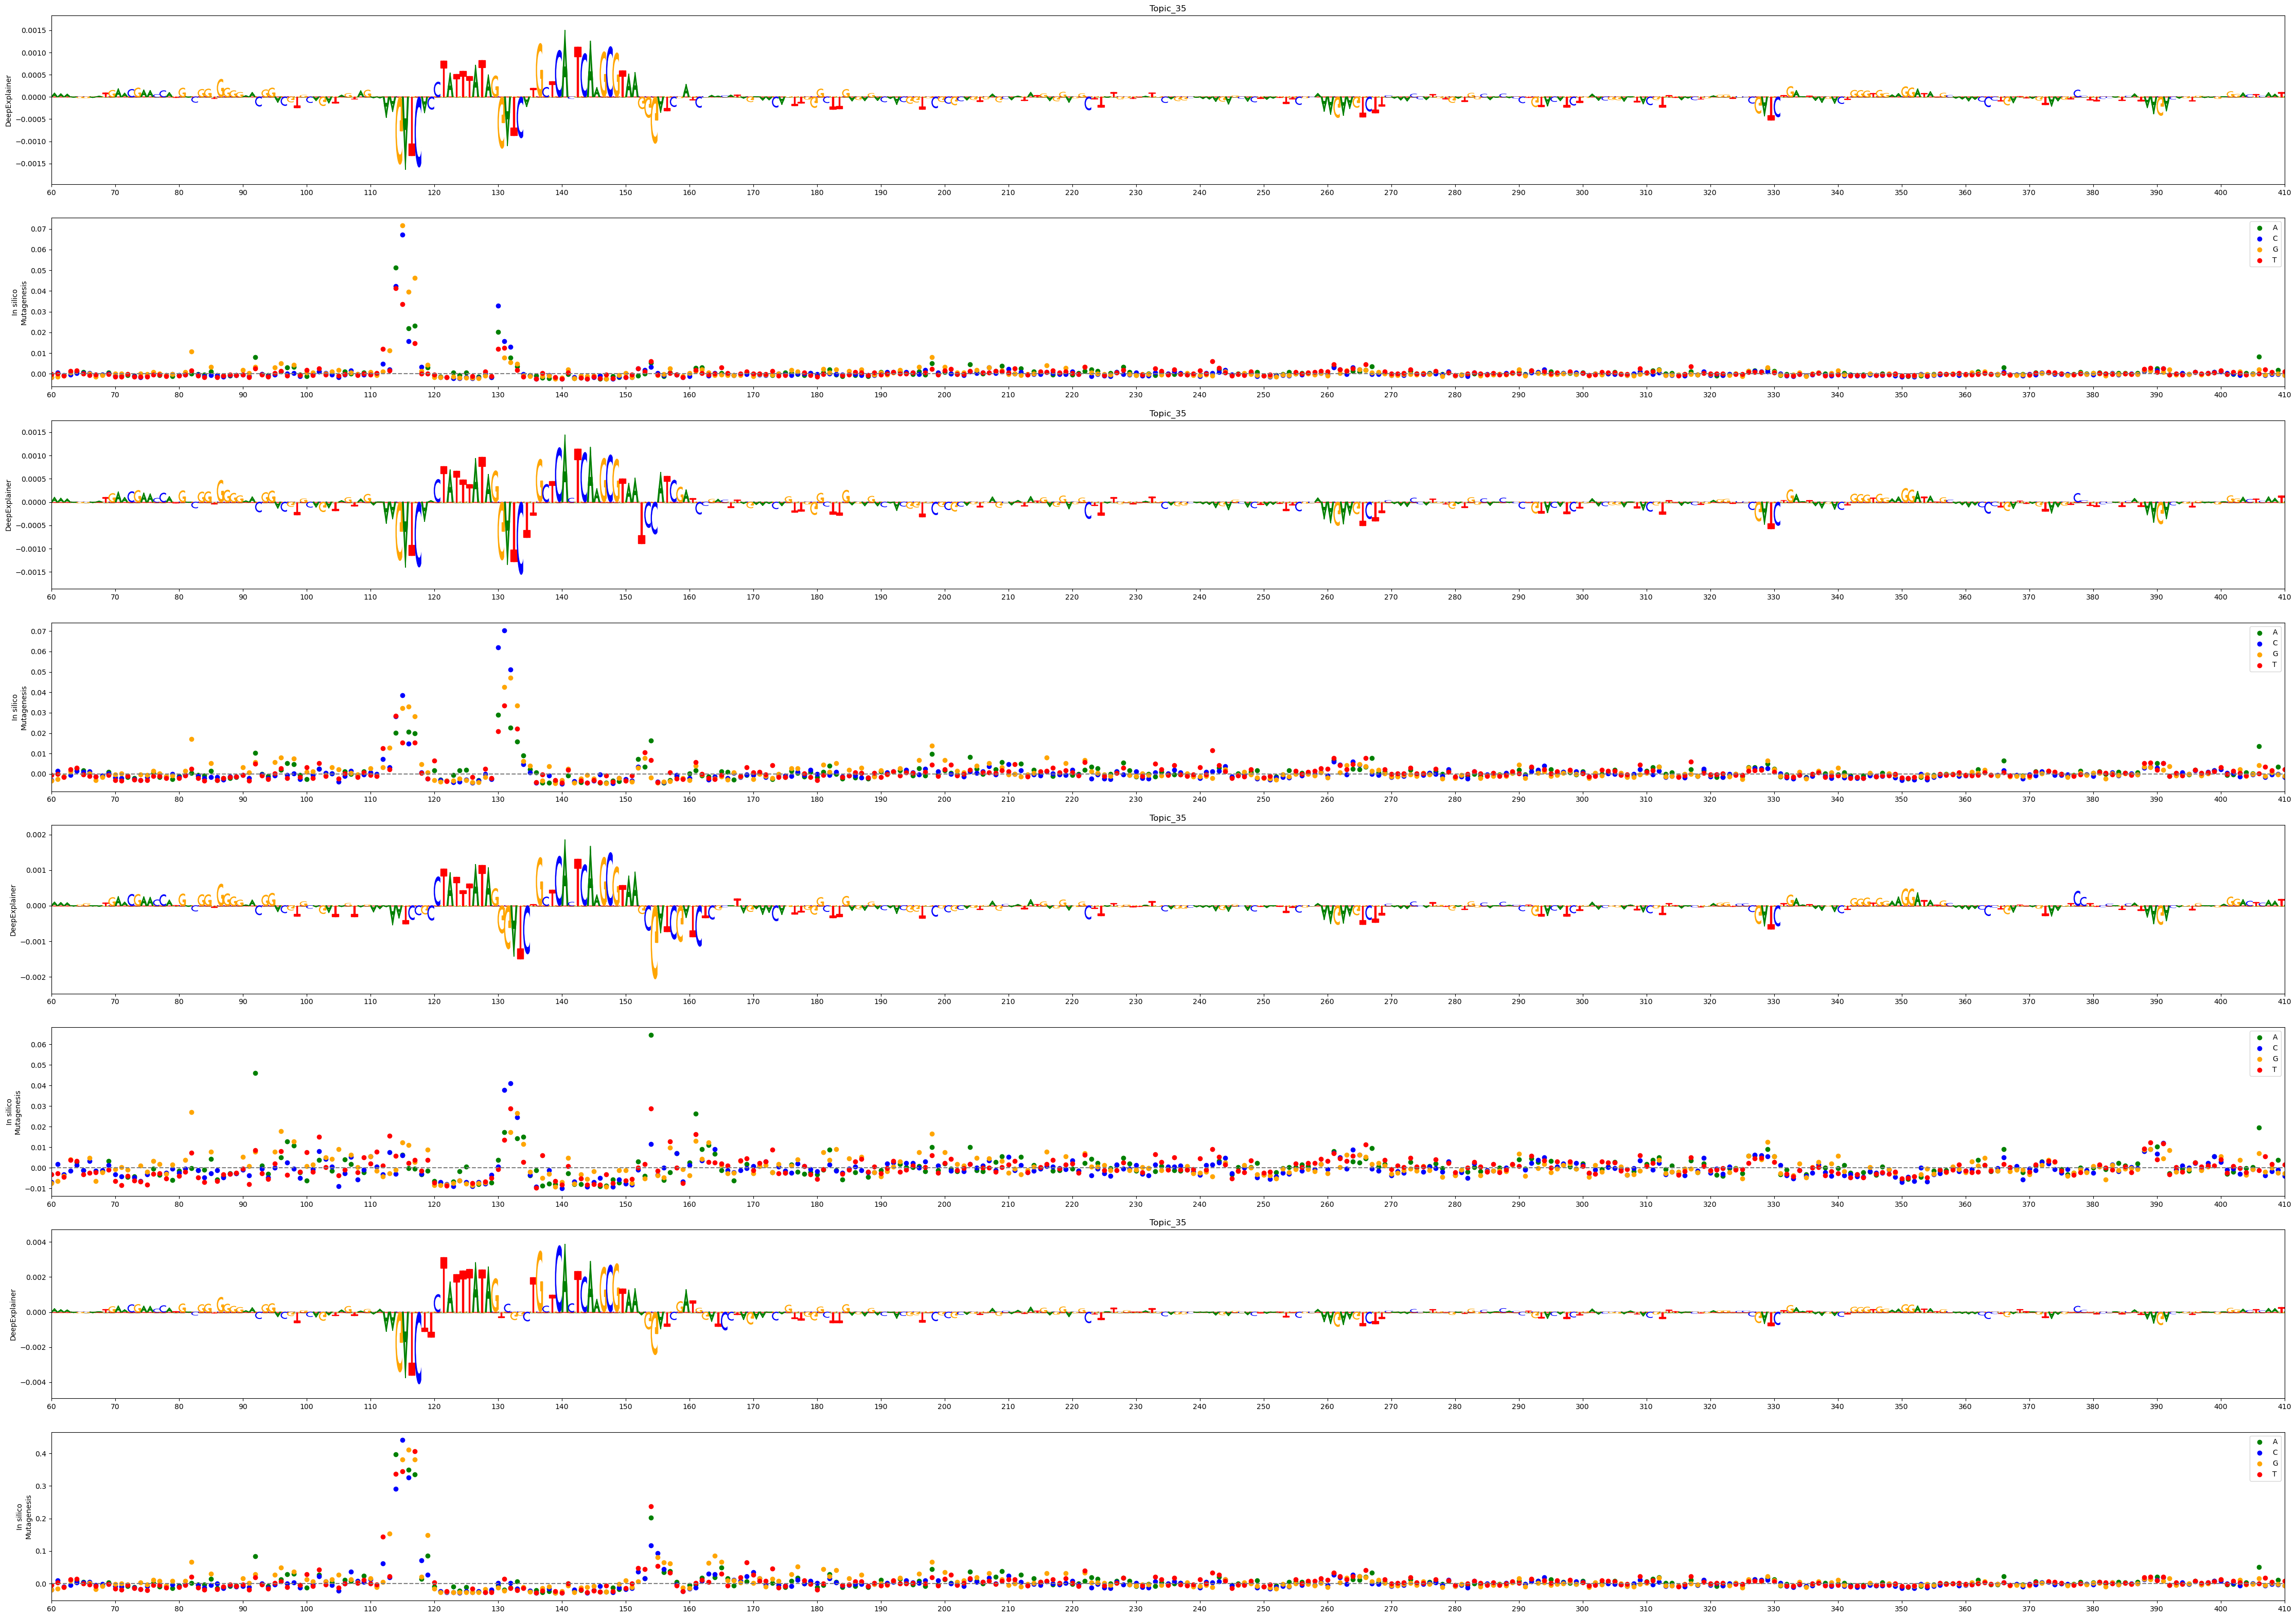

In [341]:
ids = np.argsort(random_background_predictions[:,34])[[0,10,100,1000]]

st = 60
end = 410

nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}

ntrack = 8
fig = plt.figure(figsize=(56,ntrack*5))

for i,id_ in enumerate(ids):
    start_x  = np.copy(repeated_start_x[id_:id_+1])
    ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=i*2+1, seq_onehot=start_x, class_no = 35)
    ax1.set_xlim([st,end])
    ax2 = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=i*2+2, seq_onehot=start_x, class_no = 35)
    ax2.set_xlim([st,end])

plt.savefig("figures/motif_embedding/random_background_worst_0_10_100_1000_deepexplainer.pdf",transparent=True)

### Choosing another motif implantation example where TF motifs are not located as close as the one showed above

In [101]:
import pickle
f = open("data/motif_embedding/shuffled_seq.pkl", "rb")
start_x = pickle.load(f)
f.close()

motif_embedding_test = {}
motif_embedding_test['0'] = {"regions":start_x}
motif_embedding_test["e"] = utils.add_pattern_to_best_location(patterns_dict["ey"], motif_embedding_test['0']['regions'], model_dict["DeepFlyBrain"], class_no=35)
motif_embedding_test["em"] = utils.add_pattern_to_best_location(patterns_dict["mef2"], motif_embedding_test["e"]['regions'], model_dict["DeepFlyBrain"], class_no=35)
motif_embedding_test["emo"] = utils.add_pattern_to_best_location(patterns_dict["onecut"], motif_embedding_test["em"]['regions'], model_dict["DeepFlyBrain"], class_no=35)

for key in motif_embedding_test:
    motif_embedding_test[key]["prediction"] = model_dict["DeepFlyBrain"].predict(motif_embedding_test[key]["regions"])

Sequence index: 0,
Sequence index: 0,
Sequence index: 0,


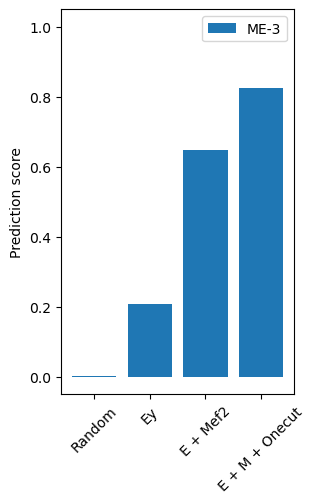

In [103]:
id_ = 0
pred = []
pred.append(motif_embedding_test['0']['prediction'][id_][34])
pred.append(motif_embedding_test['e']['prediction'][id_][34])
pred.append(motif_embedding_test['em']['prediction'][id_][34])
pred.append(motif_embedding_test['emo']['prediction'][id_][34])

plt.figure(figsize=(3,5))
_ = plt.bar(range(4),pred,label="ME-3",color="C"+str(0))
#_ = plt.plot(pred,linestyle="--",linewidth=0.5,color="C"+str(0))  

plt.legend()    
plt.ylim([-0.05,1.05])
_ = plt.xticks(range(4),['Random','Ey','E + Mef2','E + M + Onecut'],rotation=45)
plt.ylabel("Prediction score")
plt.savefig("figures/motif_embedding/example_ey_mef2_onecut_prediction.pdf",transparent=True)

### This function implants motifs to all possible location on a given sequence

In [104]:
def add_pattern_to_all_location(pattern, region, model, class_no):
    tmp_array = np.zeros((region.shape[0]-pattern.shape[1]+1,region.shape[0],region.shape[1]))
    for nt in range(tmp_array.shape[0]):
        tmp_array[nt] = np.copy(region)
        tmp_array[nt,nt:nt+pattern.shape[1],:] = pattern[0]
    prediction = model.predict(tmp_array)[:,class_no-1]
    return prediction

### Plotting intermediate prediction scores for each location during motif implantation

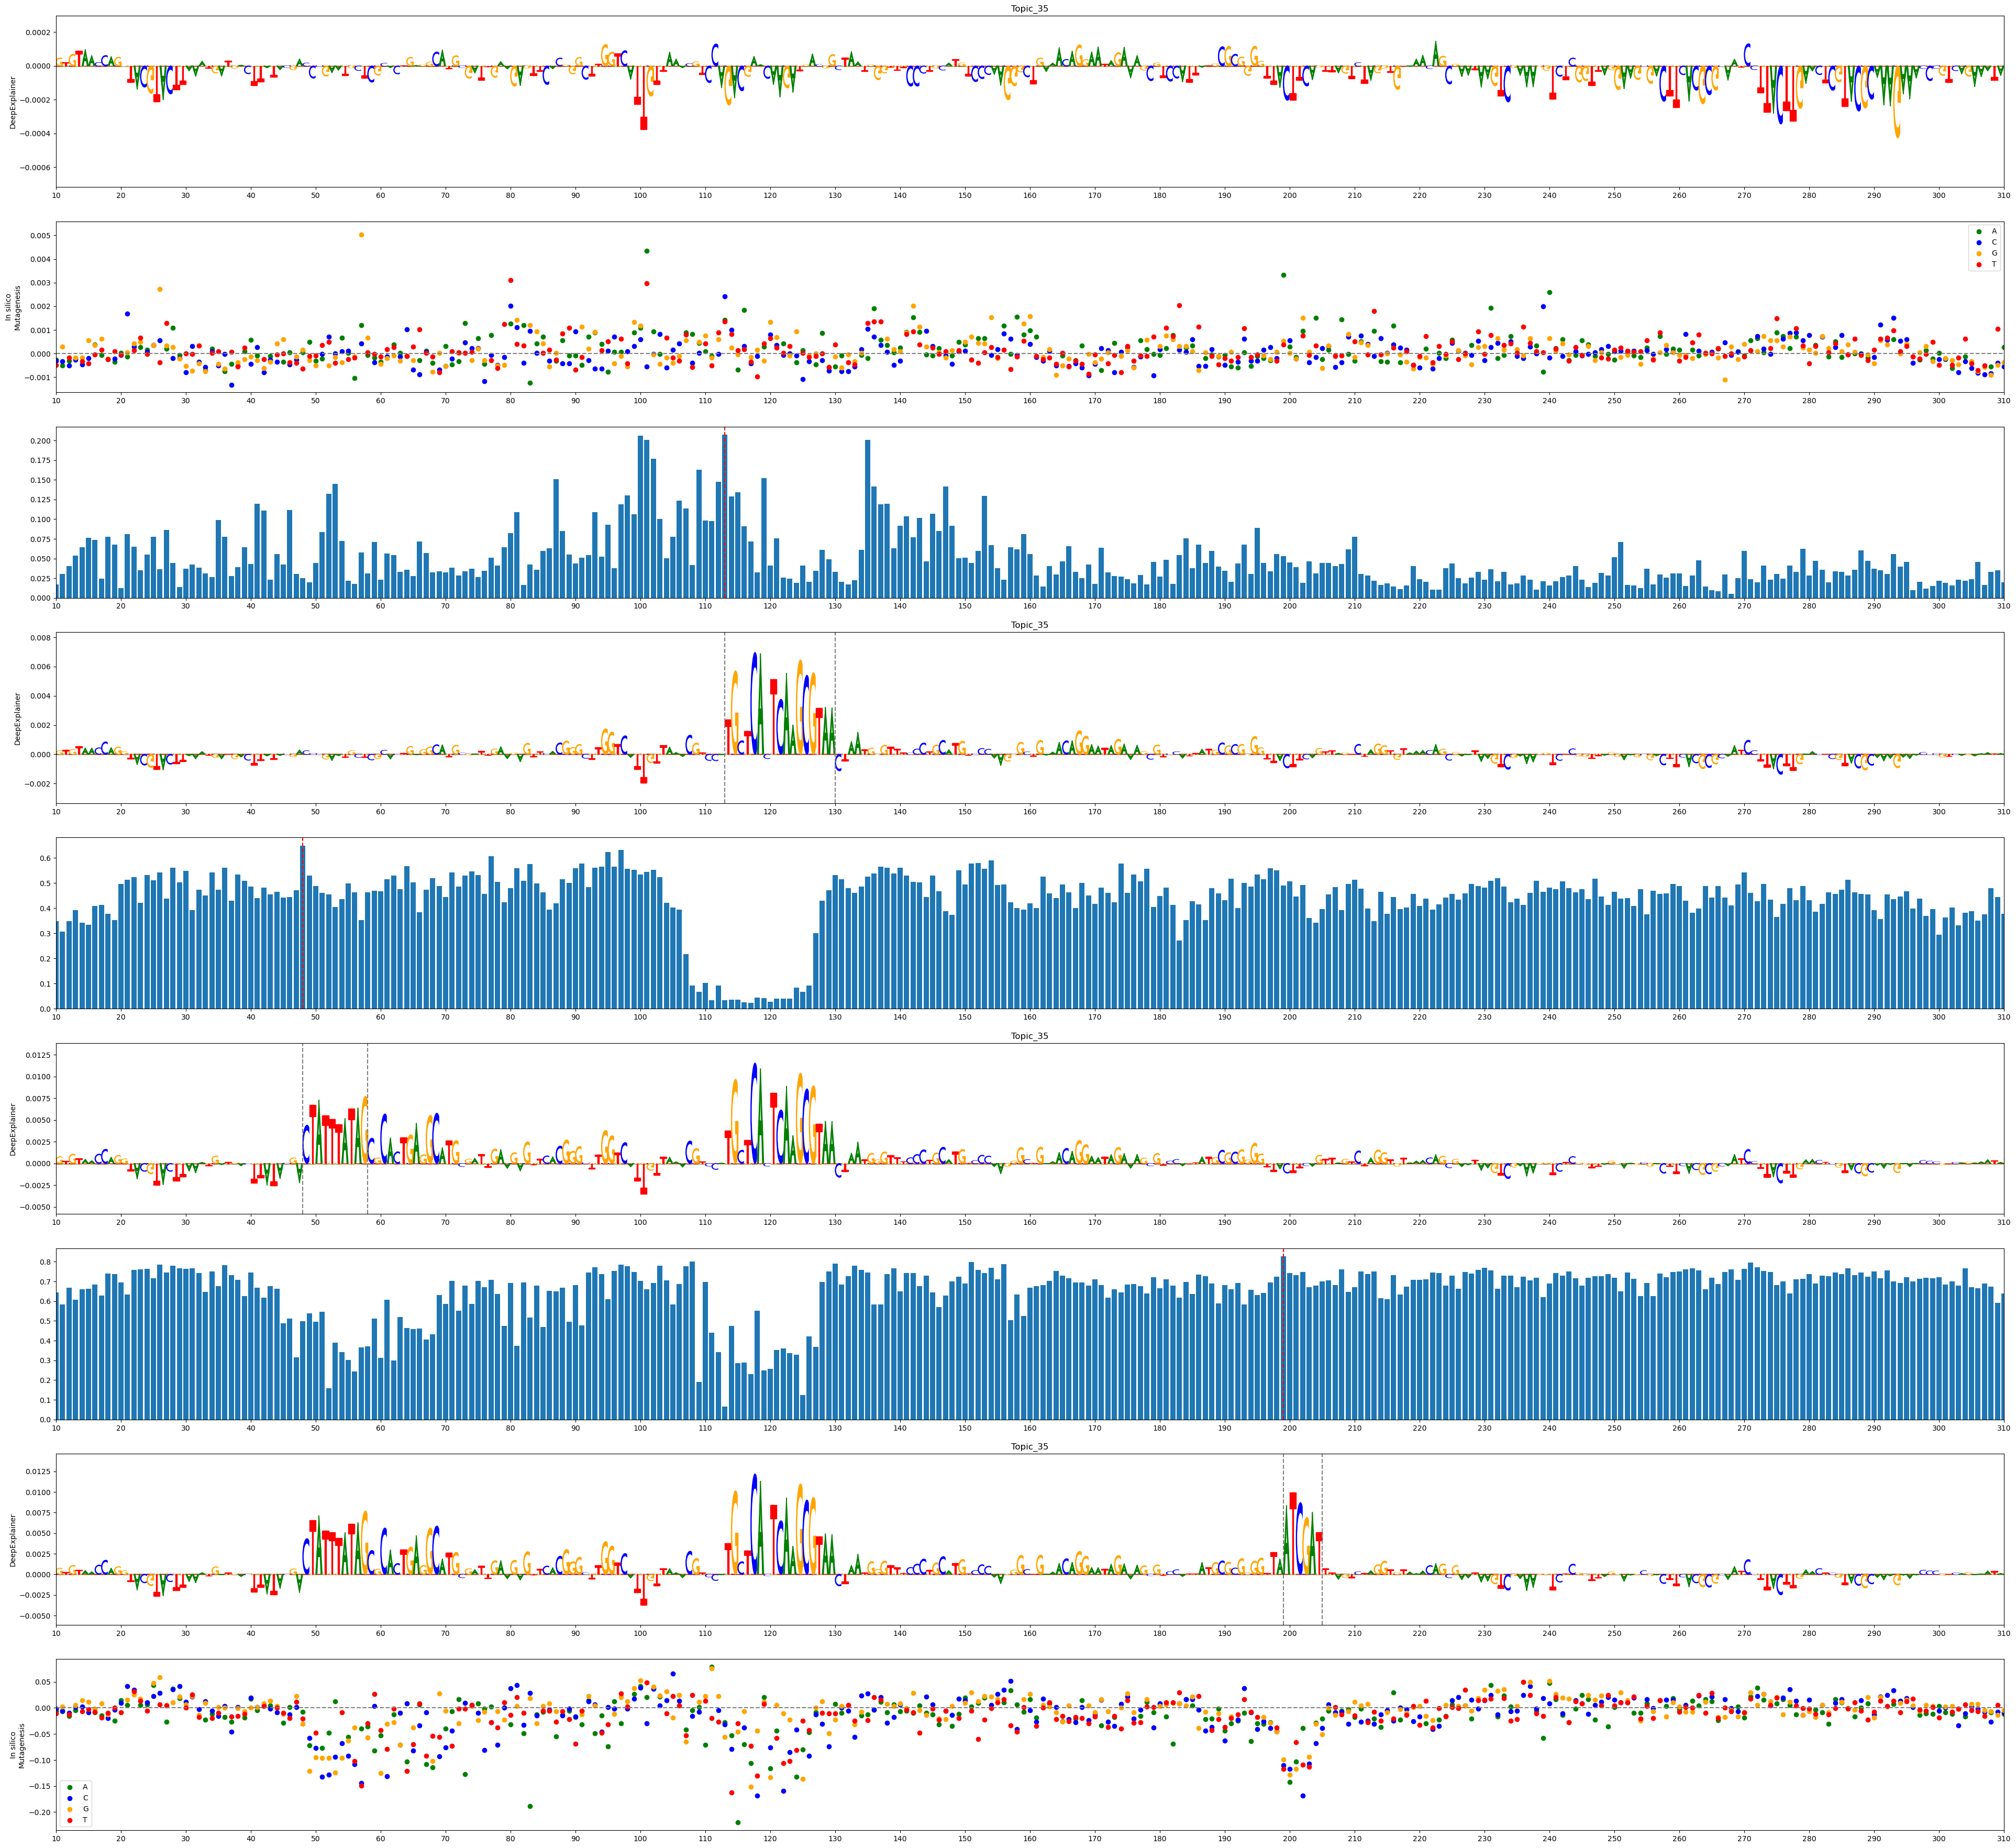

In [126]:
nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}
id_ = 0

st = 10
end = 310

ntrack = 9
fig = plt.figure(figsize=(48,ntrack*5))

start_x  = np.copy(motif_embedding_test['0']['regions'][id_:id_+1])
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 35)
ax2 = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 35)

ax3 = fig.add_subplot(ntrack,1,3)
pred_ = add_pattern_to_all_location(patterns_dict["ey"], motif_embedding_test['0']['regions'][id_], model_dict["DeepFlyBrain"], class_no=35)
ax3.bar(range(len(pred_)),pred_)
ax3.axvline(x=np.argmax(pred_),color='red',linestyle="--")
ax3.margins(x=0)
_ = plt.xticks(range(0,501,10),list(range(0,501,10)))

start_x  = np.copy(motif_embedding_test['e']['regions'][id_:id_+1])
ax4 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=start_x, class_no = 35)
ax4.axvline(x=motif_embedding_test['e']['locations'][id_],linestyle="--",color="gray")
ax4.axvline(x=motif_embedding_test['e']['locations'][id_]+17,linestyle="--",color="gray")

ax5 = fig.add_subplot(ntrack,1,5)
pred_ = add_pattern_to_all_location(patterns_dict["mef2"], motif_embedding_test['e']['regions'][id_], model_dict["DeepFlyBrain"], class_no=35)
ax5.bar(range(len(pred_)),pred_)
ax5.axvline(x=np.argmax(pred_),color='red',linestyle="--")
ax5.margins(x=0)
_ = plt.xticks(range(0,501,10),list(range(0,501,10)))

start_x  = np.copy(motif_embedding_test['em']['regions'][id_:id_+1])
ax6 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=6, seq_onehot=start_x, class_no = 35)
ax6.axvline(x=motif_embedding_test['em']['locations'][id_],linestyle="--",color="gray")
ax6.axvline(x=motif_embedding_test['em']['locations'][id_]+10,linestyle="--",color="gray")


ax7 = fig.add_subplot(ntrack,1,7)
pred_ = add_pattern_to_all_location(patterns_dict["onecut"], motif_embedding_test['em']['regions'][id_], model_dict["DeepFlyBrain"], class_no=35)
ax7.bar(range(len(pred_)),pred_)
ax7.axvline(x=np.argmax(pred_),color='red',linestyle="--")
ax7.margins(x=0)
_ = plt.xticks(range(0,501,10),list(range(0,501,10)))

start_x  = np.copy(motif_embedding_test['emo']['regions'][id_:id_+1])
ax8 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=8, seq_onehot=start_x, class_no = 35)
ax8.axvline(x=motif_embedding_test['emo']['locations'][id_],linestyle="--",color="gray")
ax8.axvline(x=motif_embedding_test['emo']['locations'][id_]+6,linestyle="--",color="gray")
ax9 = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=9, seq_onehot=start_x, class_no = 35)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
    ax.set_xlim([st,end])

plt.savefig("figures/motif_embedding/example_ey_mef2_onecut_deepexplainer_st10_end310.pdf",transparent=True,dpi=300)